In [836]:
import quandl
import pandas as pd
import numpy as np
import os
import seaborn as sns
import sklearn
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html


In [838]:
%matplotlib inline

In [840]:
#importing data
path = r'/Users/febingeorge/Documents/Career Foundry Notes'

In [872]:
#importing data
data = pd.read_csv(os.path.join(path,'QDL_OPEC.csv'),index_col = False)

##### My dataset does not contains time series data, so I have taken QDL/OPEC dataset from Organization of the Petroleum Exporting Countries (OPEC) as the rise and fall of crude oil prices will have an adverse effect on the boat prices thereby affecting its sales

In [874]:
data.head()

,date,value
0,2024-01-25,81.98
1,2023-12-04,79.63
2,2023-12-01,82.54
3,2023-11-30,85.00
4,2023-11-29,83.89


In [846]:
data.shape

(5435, 2)

In [848]:
data.isnull().sum()

date     0
value    0
dtype: int64

In [850]:
data.columns

Index(['date', 'value'], dtype='object')

In [852]:
data.describe()

,value
count,5435.000000
mean,69.908598
std,26.418165
min,12.220000
25%,49.490000
50%,67.000000
75%,90.910000
max,140.730000


In [753]:
#data_sub = data.loc[(data['date'] >= '2005-01-01') & (data['date'] < '2017-06-01')]

In [903]:
data.shape

(4039, 2)

In [826]:
data.columns

Index(['date', 'value'], dtype='object')

In [876]:
data['datetime'] = pd.to_datetime(data['date']) # Create a datetime column from "Date.""
data = data.set_index('datetime') # Set the datetime as the index of the dataframe.
data.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data.head()

,value
datetime,
2024-01-25,81.98
2023-12-04,79.63
2023-12-01,82.54
2023-11-30,85.00
2023-11-29,83.89


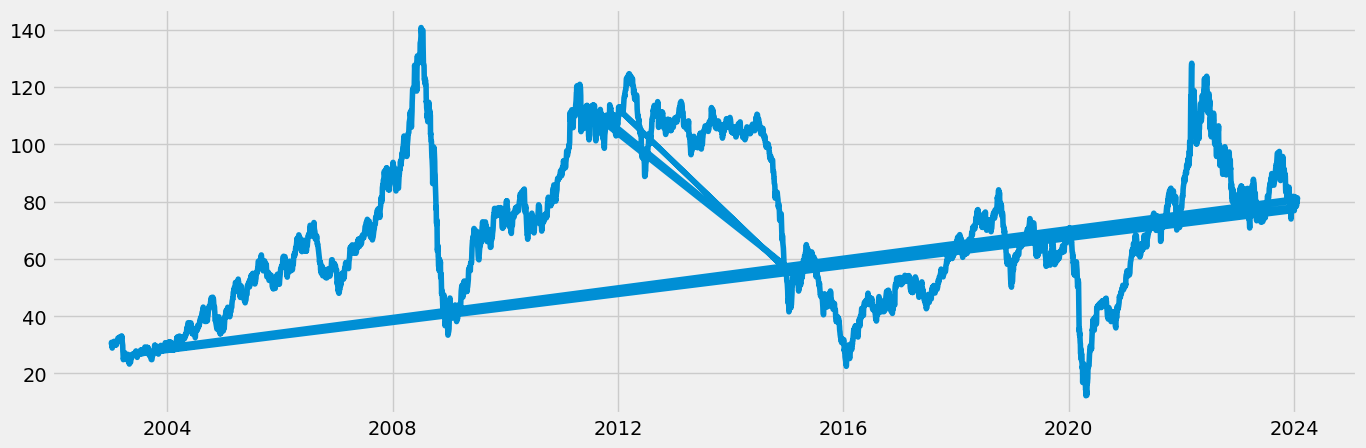

In [878]:

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### The data requires some smoothing has there are too many data points

In [880]:
data.duplicated().sum()

1367

In [882]:
data = data.drop_duplicates()

In [886]:
data.dtypes

value    float64
dtype: object

In [888]:
data.columns

Index(['value'], dtype='object')

In [964]:
# Smooth Moving Average for the data (30 days)
data['SMA'] = data['value'].rolling(30).mean()

In [895]:
data.dropna(inplace = True)

In [897]:
data.head()

,value,SMA
datetime,,
2023-10-25,90.83,85.589333
2023-10-24,91.29,85.899667
2023-10-23,94.29,86.388333
2023-10-20,95.72,86.827667
2023-10-19,93.63,87.115333


In [899]:
data.tail()

,value,SMA
datetime,,
2003-01-13,29.82,31.292667
2003-01-09,29.51,31.183333
2003-01-08,28.86,31.069000
2003-01-03,30.83,31.026000
2003-01-02,30.05,30.940000


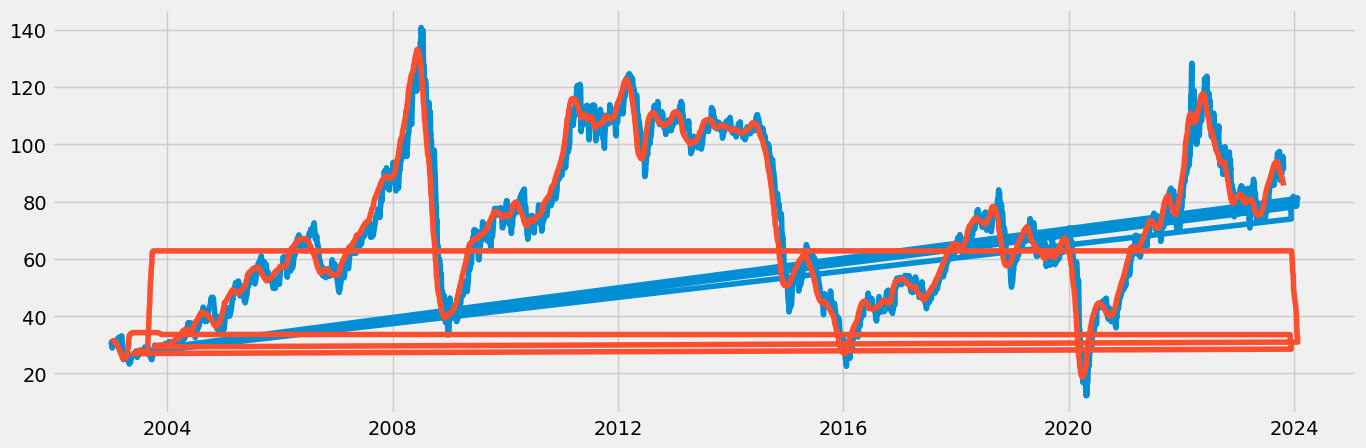

In [901]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

#### The smoothing curve would be used as this has less noise

# Subsetting, wrangling, and cleaning time-series data

In [905]:
# Reset index so that you can use the "datetim" column as a filter
data = data.reset_index()

In [911]:
# Extract month from the 'Date' column in the dataframe
data['Month'] = pd.DatetimeIndex(data['datetime']).month

In [915]:
# Extract year from the 'Date' column in the dataframe
data['Year'] = pd.DatetimeIndex(data['datetime']).year

In [919]:
 #Creating a new column with year and month combined
data['Date_new'] = pd.to_datetime(data.Year.astype(str) + '-' + data.Month.astype(str))

In [921]:
data.head()

,datetime,value,SMA,Month,Year,Date_new
0,2023-10-25,90.83,85.589333,10,2023,2023-10-01
1,2023-10-24,91.29,85.899667,10,2023,2023-10-01
2,2023-10-23,94.29,86.388333,10,2023,2023-10-01
3,2023-10-20,95.72,86.827667,10,2023,2023-10-01
4,2023-10-19,93.63,87.115333,10,2023,2023-10-01


In [923]:
# Creating a new dataframe with median value grouped by 'Date_new'
data_group = data.groupby('Date_new').agg({'SMA': ['median']})

In [925]:
data_group.shape

(252, 1)

In [927]:
data_group.head(5)

,SMA
,median
Date_new,
2003-01-01,31.183333
2003-02-01,29.218833
2003-03-01,25.273333
2003-04-01,26.047000
2003-05-01,33.766333


In [929]:
data_group.dtypes

SMA  median    float64
dtype: object

In [931]:
# Check for missing values (you shouldn't have any)
data_group.isnull().sum()

SMA  median    0
dtype: int64

In [933]:
# Check for duplicates
dups = data_group.duplicated()
dups.sum()

0

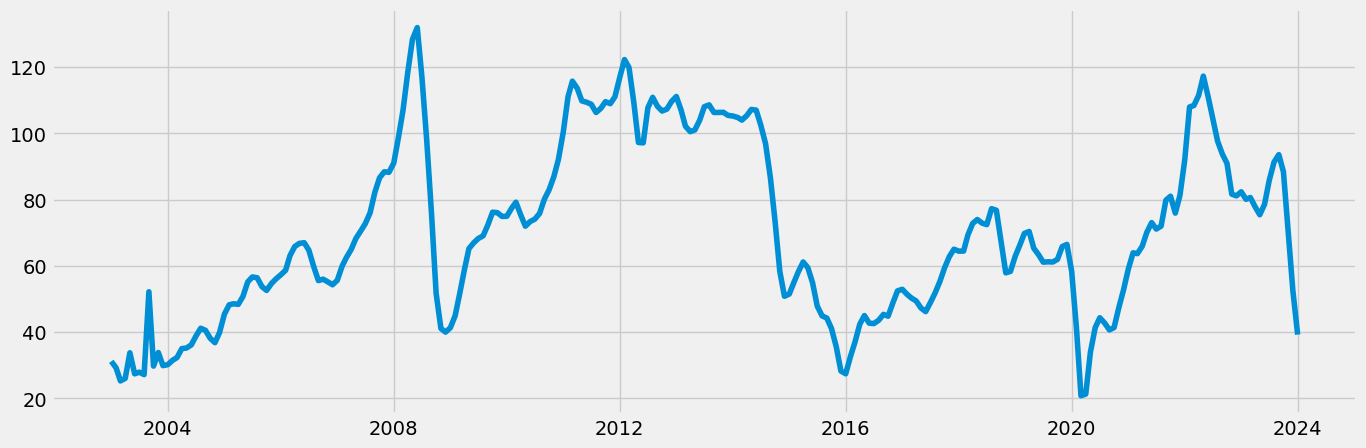

In [935]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_group)

In [945]:
data_group.sort_index(inplace= True)

# Decomposing of the data for time-series analysis

In [949]:
# Decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(x = data_group, model='additive',period=7)

In [951]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

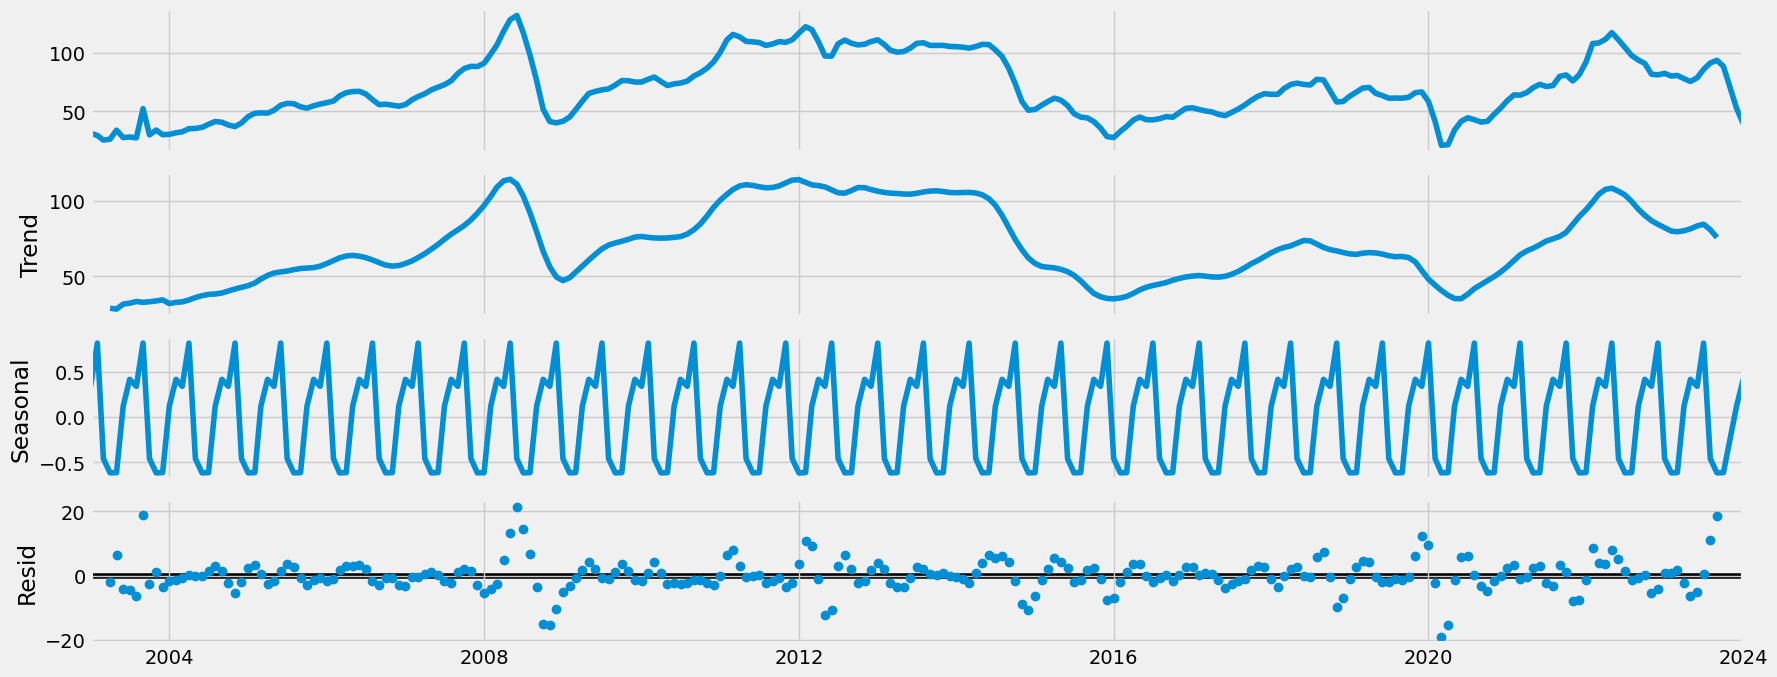

In [953]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

## a. Dickey-Fuller Test


#### It is vital data is stationary, otherwise, we will not have a reliable basis to build the forecasting on. The presence of a data trend implies the data is non-stationary. A Dickey-Fuller test will be conducted to check for stationarity.

In [972]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_group['SMA'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.249738
p-value                          0.017280
Number of Lags Used              2.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


#### Considering a significance level of 1%, the “Critical Value of 1% has a value of -3.456888. This is smaller than the test statistic, which is -3.249738, which means that the null hypothesis cannot be rejected.This also means that the data is non-stationary.


## b. Autocorrelation Test

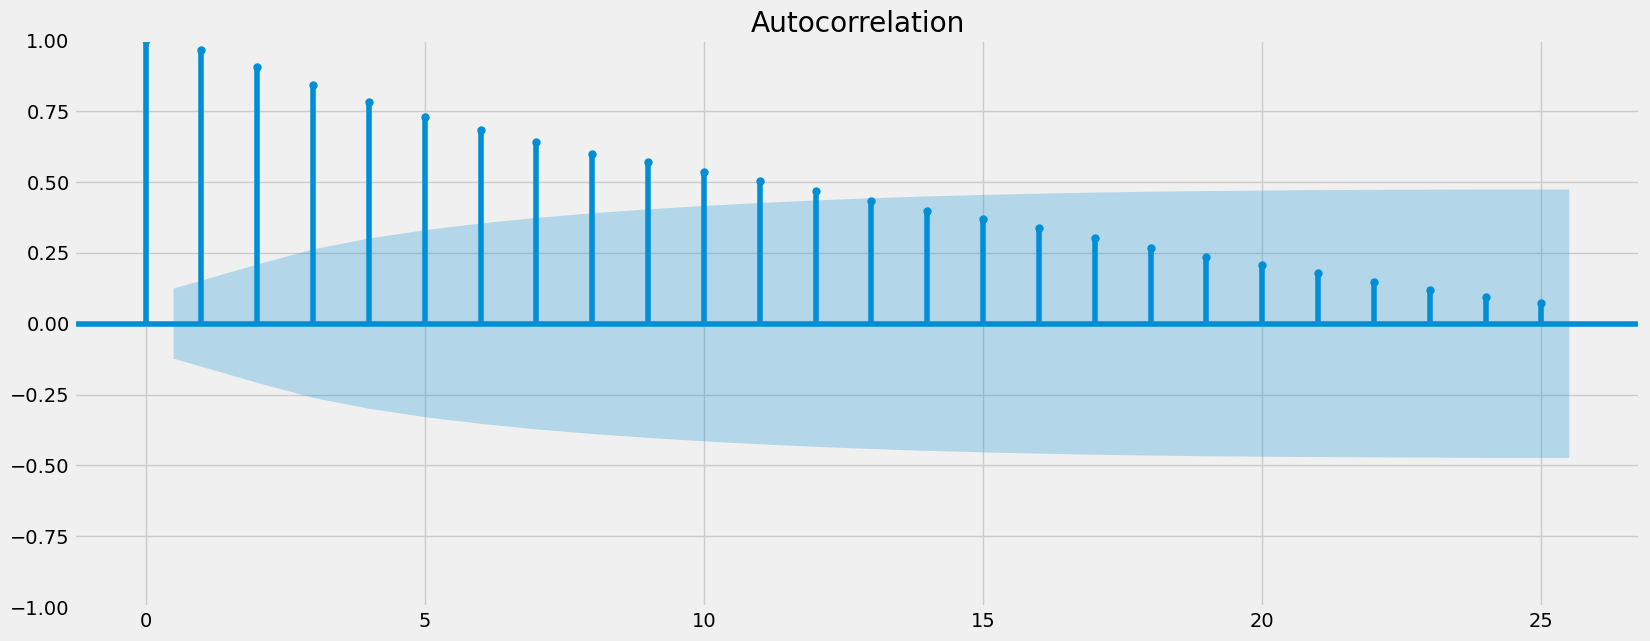

In [980]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_group)
plt.show()

#### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means there are lags that are significantly correlated with each other. Thus, it can be deduced that the data is non-stationary.

# Stationarizing the Data

In [987]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data_group - data_group.shift(1)

In [989]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [991]:
# Checking values and headers

data_diff.head()

,SMA
,median
Date_new,
2003-02-01,-1.964500
2003-03-01,-3.945500
2003-04-01,0.773667
2003-05-01,7.719333
2003-06-01,-6.353333


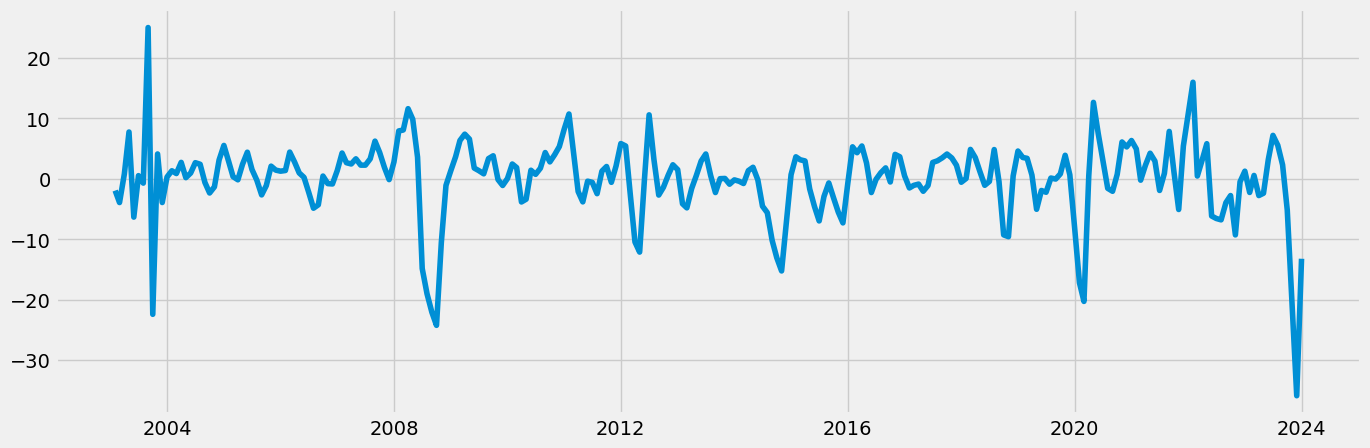

In [993]:
# Checking out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [995]:
# Re-running the Dickey-Fuller Test to check for stationarity
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.999135e+00
p-value                        2.359753e-12
Number of Lags Used            1.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


#### The results show that the data is now stationary. The test statistic value (-7.9991353) is smaller than all the critical values and the p-value is smaller than 0.05. Therefore, the test result is significant and the null hypothesis can be rejected.

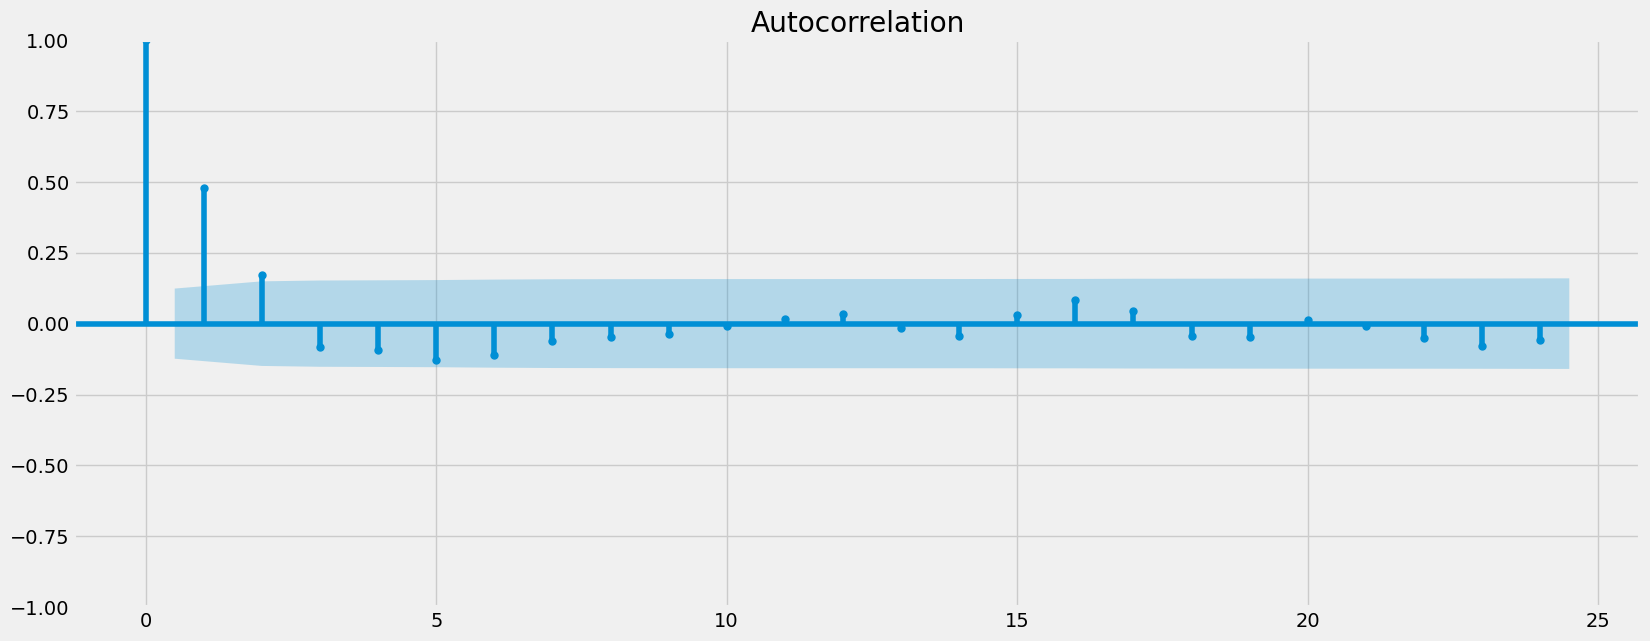

In [1000]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()